In [2]:
import numpy as np
from scipy.special import lambertw
import scipy.linalg as sl
import matplotlib.pyplot as plt
import matplotlib_settting
from functions import Spectral

# $y$ and $x$ as Lambert W functions for $\gamma=1$. Keto2020

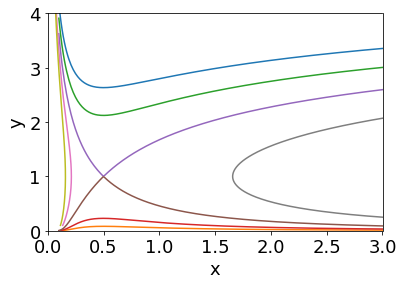

In [3]:
W = lambda x,k: np.real(lambertw(x,k=k)) # I only need the real parts


Lc = 3/2 - 2*np.log(2)
L_range = [Lc-2, Lc-1, Lc, Lc+1, Lc+2]
x = np.linspace(0.1,10,1000)
y = np.linspace(0.1,4,1000)
for L in L_range:
    if L<=Lc:
        y1 = np.sqrt( -W( -np.exp(-2/x - 4*np.log(x) + 2*L ), k=-1) )
        y2 = np.sqrt( -W( -np.exp(-2/x - 4*np.log(x) + 2*L ), k=0) )

        plt.plot(x,y1)
        plt.plot(x,y2)
    else:
        # physically impossible, this is plotted just for completeness
        x1 = -1/( 2*W( -0.5*np.exp( -y**2/4 + np.log(y)/2 - L/2 ), k=-1) )
        x2 = -1/( 2*W( -0.5*np.exp( -y**2/4 + np.log(y)/2 - L/2 ), k=0) )

        plt.plot(x1,y)
        plt.plot(x2,y)
plt.xlim(0,3)
plt.ylim(0,4)
plt.xlabel("x")
plt.ylabel("y");

# Aikawa1979, system (5)

$$
\begin{bmatrix}
(z_0^{\gamma-1}-y_0^2)\frac{d}{dx} + (\gamma-1)z_0^{\gamma-2}z_0' & 2y_0' \\
-(\gamma-1)y_0z_0^{\gamma-2}z_0' & (z_0^{\gamma-1}-y_0^2)\frac{d}{dx} - (y_0y_0' + \frac{z_0^{\gamma-1}}{y_0}y_0')
\end{bmatrix}
\begin{bmatrix}
z \\ w
\end{bmatrix}
=
\beta
\begin{bmatrix}
y_0 & -1 \\
-z_0^{\gamma-1} & y_0
\end{bmatrix}
\begin{bmatrix}
z \\ w
\end{bmatrix}
$$

## $ \gamma =1 $

$$
\begin{bmatrix}
(1-y_0^2)\frac{d}{dx} & 2y_0' \\
0 & (1-y_0^2)\frac{d}{dx} - (y_0y_0' + \frac{1}{y_0}y_0')
\end{bmatrix}
\begin{bmatrix}
z \\ w
\end{bmatrix}
=
\beta
\begin{bmatrix}
y_0 & -1 \\
-1 & y_0
\end{bmatrix}
\begin{bmatrix}
z \\ w
\end{bmatrix}
$$

In [45]:
N = 600
spectral = Spectral(N, "nonsymmetric", "FD")
xm = 0.5
x = 4.5*spectral.x + xm
D = spectral.D1/4.5

lam_c = np.exp(3/2)/4
k = 0 # supersonic, k=-1 branch; subsonic k=0 branch

y0 = np.sqrt( -W( -np.exp(-2/x - 4*np.log(x) + 2*np.log(lam_c) ), k) )
z0 = lam_c/(x**2 * y0)

A11 = np.diag(1 - y0**2)@D
A12 = np.diag(2*D@y0)
A21 = np.zeros_like(A11)
A22 = np.diag(1 - y0**2)@D - np.diag(y0*(D@y0) + 1/y0*(D@y0))
# A = np.block([[A11[:-1,:-1], A12[:-1,:-1]], [A21[:-1,:-1], A22[:-1,:-1]]])
A = np.block([[A11, A12], [A21, A22]])

B11 = np.diag(y0)
B12 = -np.eye(y0.size)
B21 = B12
B22 = B11
#B = np.block([[B11[:-1,:-1], B12[:-1,:-1]], [B21[:-1,:-1], B22[:-1,:-1]]])
B = np.block([[B11, B12], [B21, B22]])

# beta, V = sl.eig(A,B)
beta, V = np.linalg.eig(np.linalg.inv(B)@A)
#z_arr = np.pad(V[:int(V.shape[0]/2), :], ((0,1),(0,0)))
#w_arr = np.pad(V[int(V.shape[0]/2):, :], ((0,1),(0,0)))
z_arr = V[:int(V.shape[0]/2), :]
w_arr = V[int(V.shape[0]/2):, :]

Text(0, 0.5, 'phase')

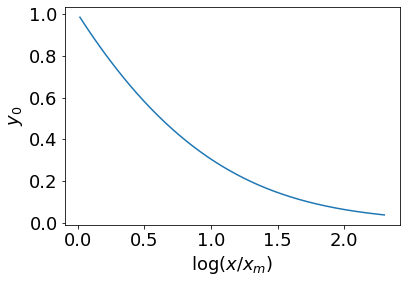

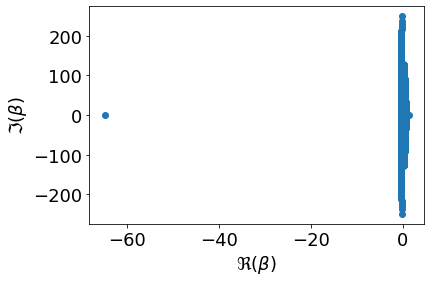

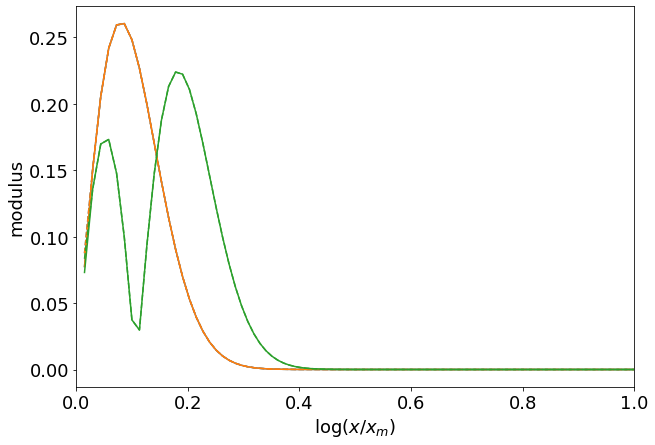

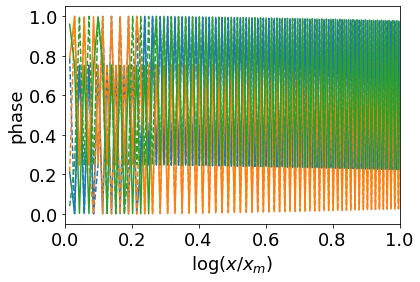

In [46]:
plt.figure()
plt.plot(np.log(x/xm),y0)
plt.xlabel("$\log(x/x_m)$")
plt.ylabel("$y_0$")

plt.figure()
plt.plot(beta.real, beta.imag, 'o')
plt.xlabel("$\Re(\\beta)$")
plt.ylabel("$\Im(\\beta)$")

plt.figure(figsize=(10,7))
for i in range(3):
    plt.plot(np.log(x/xm), np.abs(z_arr[:,i]), '--', color=f"C{i}", label=f"{beta[i]}")
    plt.plot(np.log(x/xm), np.abs(w_arr[:,i]), color=f"C{i}")
plt.xlim(0,1)
plt.xlabel("$\log(x/x_m)$")
plt.ylabel("modulus")
# plt.legend()

plt.figure()
for i in range(3):
    z = z_arr[:,i]
    w = w_arr[:,i]

    phi_z = -np.arctan(z.imag/z.real)/(2*np.pi)
    phi_z[phi_z<0] = phi_z[phi_z<0] + 1

    phi_w = -np.arctan(w.imag/w.real)/(2*np.pi)
    phi_w[phi_w<0] = phi_w[phi_w<0] + 1

    plt.plot(np.log(x/xm), phi_z, '--', color=f"C{i}", label=f"{beta[i]}")
    plt.plot(np.log(x/xm), phi_w, color=f"C{i}")
plt.xlim(0,1)
plt.xlabel("$\log(x/x_m)$")
plt.ylabel("phase")

## $\gamma \neq 1$

In [73]:
N = 51
spectral = Spectral(N, "nonsymmetric", "FD")
xm = 0.5
x = spectral.x + xm
D = spectral.D1
# D = (np.diag(np.ones(N))-np.diag(np.ones(N-1),k=-1))/(x[1]-x[0])
# D = (np.diag(np.ones(N-1),k=1)-np.diag(np.ones(N)))/(x[1]-x[0])

gam = 7/5
lam_c = 0.5**((gam+1)/(2*(gam-1))) * ((5-3*gam)/4)**(-(5-3*gam)/(2*(gam-1)))
lam = lam_c
k = -1 # supersonic, k=-1 branch; subsonic k=0 branch

y0 = np.sqrt( -W( -np.exp(-2/x - 4*np.log(x) + 2*np.log(lam) ), k) )
z0 = lam/(x**2 * y0)

A11 = np.diag(z0**(gam-1) - y0**2)@D + np.diag((gam-1)*z0**(gam-2)*(D@z0))
A12 = np.diag(2*D@y0)
A21 = np.diag(-(gam-1)*y0*z0**(gam-2)*(D@z0))
A22 = np.diag(z0**(gam-1) - y0**2)@D - np.diag(y0*(D@y0) - z0**(gam-1)/y0*(D@y0))
A = np.block([[A11[:-1,:-1], A12[:-1,:-1]], [A21[:-1,:-1], A22[:-1,:-1]]])

B11 = np.diag(y0)
B12 = np.eye(y0.size)
B21 = np.diag(-z0**(gam-1))
B22 = np.diag(y0)
B = np.block([[B11[:-1,:-1], B12[:-1,:-1]], [B21[:-1,:-1], B22[:-1,:-1]]])

beta, V = sl.eig(A,B)
z_arr = np.pad(V[:int(V.shape[0]/2), :], ((0,1),(0,0)))
w_arr = np.pad(V[int(V.shape[0]/2):, :], ((0,1),(0,0)))

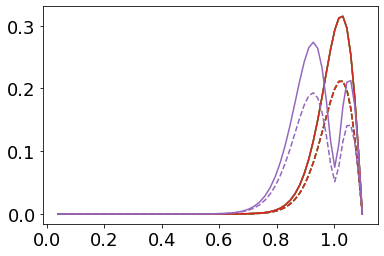

In [74]:
for i in range(5):
    plt.plot(np.log(x/xm), np.abs(z_arr[:,i]), color=f"C{i}" )
    plt.plot(np.log(x/xm), np.abs(w_arr[:,i]), '--', color=f"C{i}" )

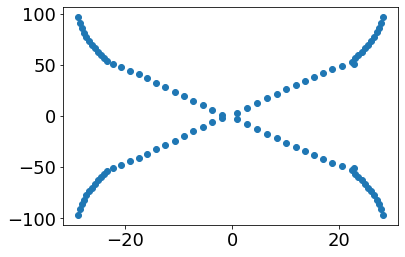

In [75]:
plt.plot(beta.real, beta.imag, 'o')